### Classifying the Cats v Dogs dataset with a CNN
The training archive contains 25,000 images of dogs and cats. This notebook uses a simple convolutional neural network with data augmentations used the tf ImageDataGenerator to create a binary classifier.

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt




In [ ]:
# Download and extract the dataset

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-02-19 07:16:41--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.2.72.163, 2600:1407:3c00:a86::317f, 2600:1407:3c00:a8f::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.2.72.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   113MB/s    in 7.2s    

2023-02-19 07:16:49 (109 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [ ]:
# The datasets have been stored in tmp/PetImages

source_path = '/tmp/PetImages'


source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Delete the non-image files in the dataset
!find /tmp/PetImages -type f ! -name "*.jpg" -exec rm {} +

# Inspect the size of the dataset
print(f"There are {len(os.listdir(source_path_dogs))} dogs in the dataset")
print(f"There are {len(os.listdir(source_path_cats))} cats in the dataset")




There are 12500 dogs in the dataset
There are 12500 cats in the dataset


In [ ]:
# Create the training and validation datasets

root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  '''
  Creates the directories in which the training and validation images will be placed in

  args: root_path -> the root of the source directory that all images are currently in
  '''
  

  # Make the paths to the directories
  train_dir = os.path.join(root_path, "training")
  validation_dir =os.path.join(root_path, "validation")

  train_cats_dir = os.path.join(train_dir, 'cats')
  train_dogs_dir = os.path.join(train_dir, 'dogs')

  val_cats_dir = os.path.join(validation_dir, 'cats')
  val_dogs_dir = os.path.join(validation_dir, 'dogs') 


  # Create the directories
  os.makedirs(train_cats_dir)
  os.makedirs(train_dogs_dir)
  os.makedirs(val_cats_dir)
  os.makedirs(val_dogs_dir)

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")


In [ ]:
# Test the create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/validation/cats


In [ ]:
# Make a function to split the data into training and validation

def split_data(source_dir, training_dir, validation_dir,  split_size):
  """
  Split the data from the source directory into training and validation directories with a specified split size.
    
  Args:
  - source_dir (str): the path of the directory containing the source data
  - validation_dir (str): the path of the directory to save the validation data
  - training_dir (str): the path of the directory to save the training data
  - split_size (float): the percentage of data to use for validation
    
  Returns:
  - None
    
  Raises:
  - ValueError: if the split size is not between 0 and 1
    
  """

  # create empty lists for the training and validation

  split_element = int(len(os.listdir(source_dir)) * split_size)
  print(split_element)

  training = []
  validation = []

  source_list = os.listdir(source_dir)
  source_list = random.sample(source_list, len(source_list))

  count = 0

  for filename in os.listdir(source_dir):
    if os.path.getsize(os.path.join(source_dir, filename)) != 0:
      if count < split_element:
        training.append(filename)
        count += 1
      else:
        validation.append(filename)
        count += 1
      
  for filename in training:
    original_file = os.path.join(source_dir, filename)
    destination = os.path.join(training_dir, filename)
    copyfile(original_file, destination)

  for filename in validation:
    original_file = os.path.join(source_dir, filename)
    destination = os.path.join(validation_dir, filename)
    copyfile(original_file, destination)



  

In [ ]:
# Test the split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

#split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
#split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

11250
11250


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1249 images of cats for validation
There are 1249 images of dogs for validation


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs = {}):

    if (logs.get('accuracy') > 0.95 and logs.get("val_accuracy") > 0.95):
      # Accurcy acceptable
      self.model.stop_training = True
      print("\n Training stopping - Accuracy theshold met!")

callback = myCallback()

In [ ]:
def train_val_generators(training_dir, validation_dir):


  train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                     horizontal_flip = True,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     zoom_range = 0.2,
                                     shear_range = 0.2,
                                     rotation_range = 40,
                                     fill_mode = 'nearest')
  
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)


  train_generator = train_datagen.flow_from_directory(directory = training_dir, # This is the source directory for training images
                                                      target_size = (150, 150), # Images will be resized to 150*150
                                                      batch_size = 20,
                                                      class_mode = 'binary')    # becaause we are using binary_crossentropy, we need binary labels                                              

  
  validation_generator = validation_datagen.flow_from_directory(directory = validation_dir,
                                                                target_size = (150, 150),
                                                                batch_size = 20,
                                                                class_mode = 'binary')
  
  return train_generator, validation_generator


In [ ]:

# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22500 images belonging to 2 classes.
Found 2498 images belonging to 2 classes.


In [ ]:
# Define model

def create_model():
  
  model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
                              tf.keras.layers.MaxPool2D(2,2),
                              tf.keras.layers.Conv2D(32,(3,3), activation = 'relu' ),
                              tf.keras.layers.MaxPool2D((2,2)),
                              tf.keras.layers.Conv2D(64,(3,3), activation = 'relu' ),
                              tf.keras.layers.MaxPool2D((2,2)),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(256, activation = 'relu'),
                              tf.keras.layers.Dropout(0.2),
                              tf.keras.layers.Dense(1, activation = 'sigmoid')
      
  ])


  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer performs better than the RMSprop
                #optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'])
  
  print(model.optimizer)
  print(model.loss)
  print(model.metrics_names)
  
  return model

In [ ]:
model = create_model()

model.summary()

history = model.fit(train_generator,
                    epochs = 15,
                    verbose = 1,
                    validation_data = validation_generator,
                    callbacks = [callback])

[]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)     

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWar

1125/1125 [==============================] - 196s 164ms/step - loss: 0.6690 - accuracy: 0.5803 - val_loss: 0.6425 - val_accuracy: 0.6621
Epoch 2/15
1125/1125 [==============================] - 183s 163ms/step - loss: 0.6014 - accuracy: 0.6757 - val_loss: 0.5279 - val_accuracy: 0.7414
Epoch 3/15
1125/1125 [==============================] - 183s 162ms/step - loss: 0.5638 - accuracy: 0.7083 - val_loss: 0.4870 - val_accuracy: 0.7658
Epoch 4/15
1125/1125 [==============================] - 180s 160ms/step - loss: 0.5351 - accuracy: 0.7297 - val_loss: 0.4607 - val_accuracy: 0.7806
Epoch 5/15
1125/1125 [==============================] - 180s 160ms/step - loss: 0.5253 - accuracy: 0.7408 - val_loss: 0.4600 - val_accuracy: 0.7818
Epoch 6/15
1125/1125 [==============================] - 179s 159ms/step - loss: 0.5025 - accuracy: 0.7566 - val_loss: 0.4541 - val_accuracy: 0.7846
Epoch 7/15
1125/1125 [==============================] - 179s 159ms/step - loss: 0.4959 - accuracy: 0.7582 - val_loss: 0.436

| Experiment | Optimizer | Learning Rate | Num Conv Layers | Dropout layers & vales| Num Filters | Num Dense Units | Batch Size | Num Epochs | Train Accuracy | Val Accuracy | Extra Details
|-|-|-|-|-|-|-|-|-|-| - |-|
| 1 | adam |0.001 | 1 | n/a| 128 | 64 | 20 | 15 | 0.6469 | 0.6485 | |
| 2 | rmsProp | 0.0001 | 1 |n/a| 128 | 64 | 20 | 15 | 0.4856 | 0.5000 | Not learning, stopped early|
|3|rmsprop|0.0001|1|1(0.5)|128|64|20|15|0.5| 0.5 |Not learning, stopping early|
|4|Adam|0.001|1|1(0.2)|128|64|20|15|0.6337| 0.6812 |-|
|5|Adam|0.001|2|1(0.2)|128, 256|64|20|15|0.6349| 0.6467 |-|
|6|Adam|0.01|1|1(0.2)|128|64|20|15|0.5|0.5|Stopped early - not learning|
|6|Adam|0.001|1|1(0.2)|128|256|20|15|0.6477| 0.6404 |-|
|7|Adam|0.001|1|1(0.2)|16|256|20|15|0.6561| 0.6889 |-|
|8|Adam|0.001|2|1(0.2)|16, 32|256|20|15|0.7098| 0.7346 |-|
|9|rmsprop|0.0001|2|1(0.2)|16, 32|256|20|15|0.6245| 0.6572 |-|
|10|Adam|0.001|3|1(0.2)|16, 32, 64|256|20|15|0.6974| 0.7076 |-|
|11|Adam|0.001|3|1(0.2)|16, 32, 64|512|20|15|0.7074| 0.7181|-|
|12|Adam|0.001|2|1(0.2)|16, 32|256|50|15|0.7010| 0.685 |I have just realised the training and val datasets were back switched! Lesson learnt!|
|13|Adam|0.001|2|1(0.2)|16, 32|256|20|15|0.7755| 0.8006 |-|
|14|Adam|0.001|3|1(0.2)|16, 32, 64|256|20|15|0.8132| 0.8439 |-|



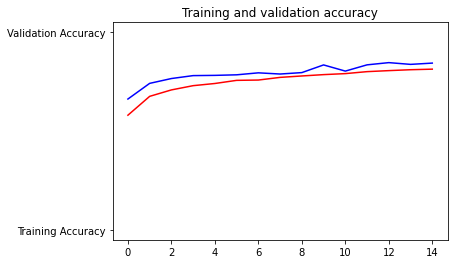

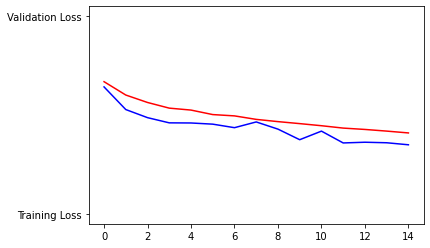

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
# Code to test the network by uploading images
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = tf.keras.utils.load_img(path, target_size=(150, 150))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")